In [1]:
# use these links to do so:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os
os.getcwd()
data=pd.read_csv("churnfile.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data=data.drop('customerID',axis=1)

In [4]:
data[data.iloc[:,:]==' '] = np.NaN

C:\Users\abhishek kapila\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:

data=data.fillna(data.mean())

In [7]:
data.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data_col=data.columns
data_col


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:

le = preprocessing.LabelEncoder()
for i in data_col:
    data[i]=le.fit_transform(data[i])

In [10]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1


In [11]:

y=data.iloc[:,-1]
X=data.iloc[:,0:-1]

In [12]:
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]], dtype=int64)

In [13]:

print(features[0:5,:])

[[   1    0  142   74]
 [  34    1  498 3624]
 [   2    0  436  536]
 [  45    1  266 3570]
 [   2    0  729  674]]


In [14]:
np.set_printoptions(precision=3) 
print(fit.scores_)

[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04 4.572e+05]


In [15]:
c=['Partner','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup','TechSupport', 'StreamingTV',
       'StreamingMovies','PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [16]:
x=data.loc[:,c]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

In [17]:
X

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

In [18]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

C:\Users\abhishek kapila\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\abhishek kapila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\abhishek kapila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


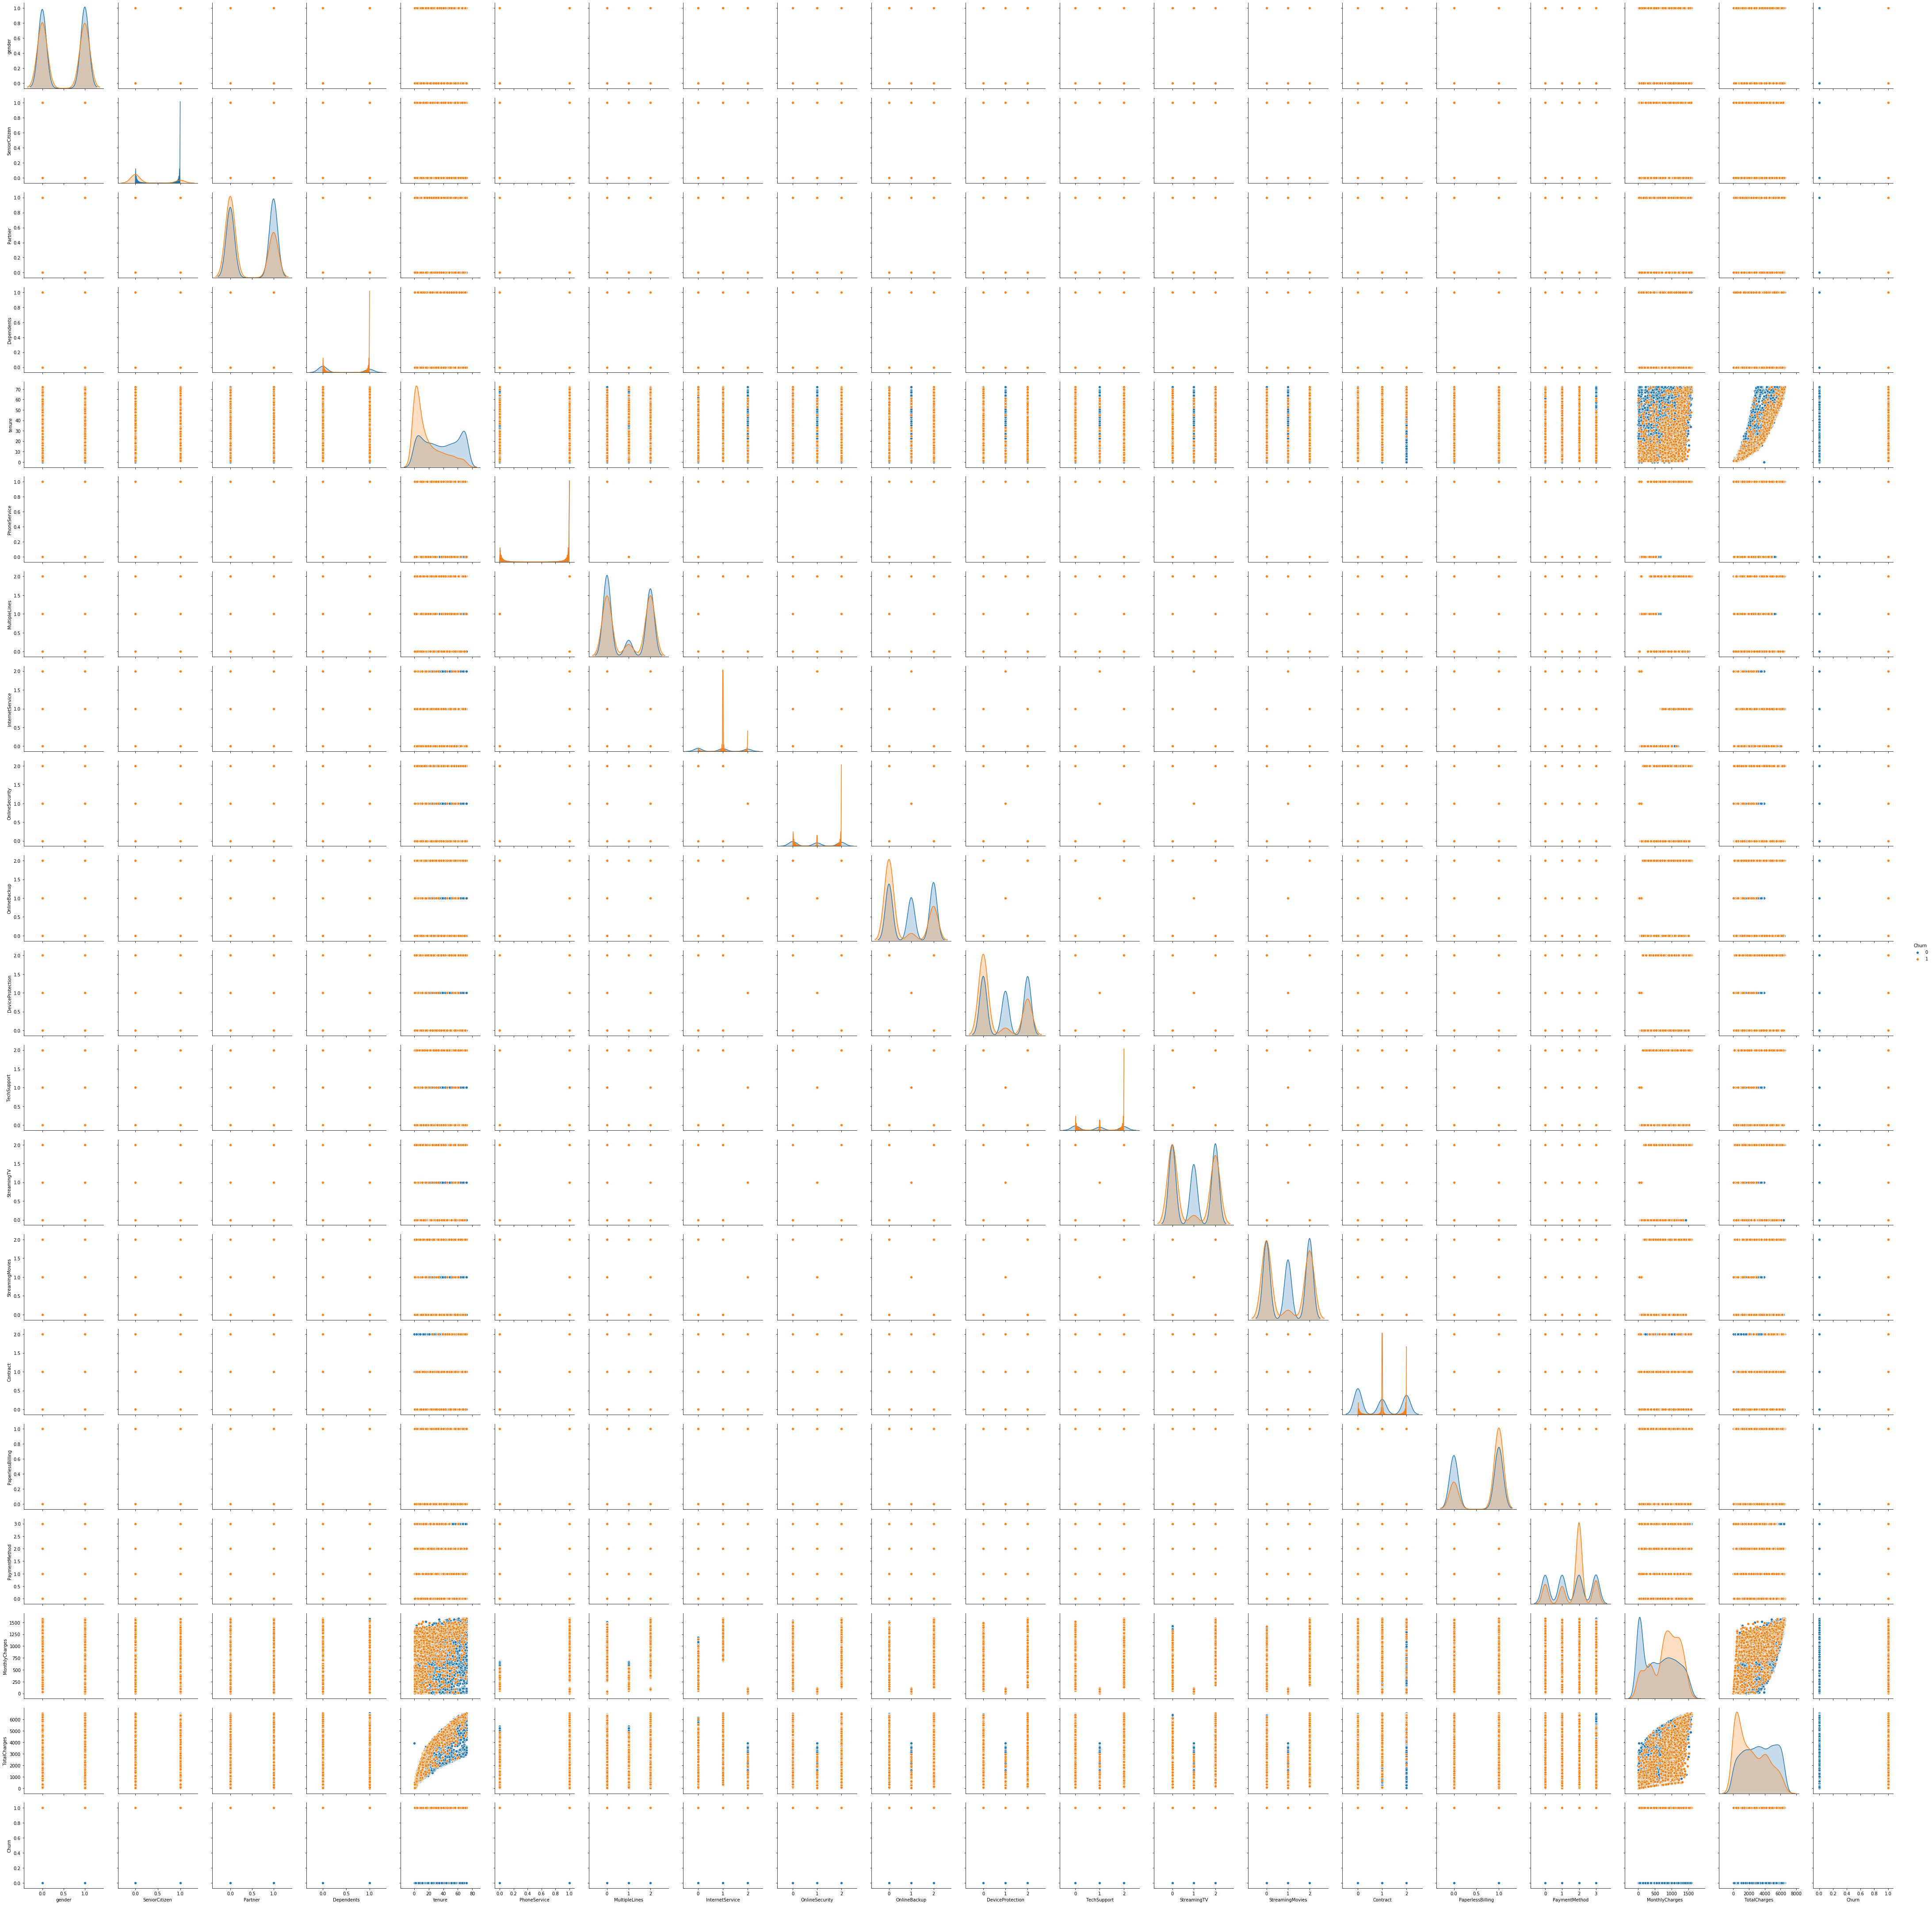

In [19]:
sns.pairplot(data, hue="Churn", size=3)